In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate, accuracy

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefINS2_6SymIntEEENS2_8optionalINS2_10ScalarTypeEEENS6_INS2_6LayoutEEENS6_INS2_6DeviceEEENS6_IbEENS6_INS2_12MemoryFormatEEE
  Referenced from: <0B637046-A38B-3A5C-80C6-E847C27DCCD5> /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <BB02660F-1D5B-3388-B48B-486877D726F6> /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


In [3]:
PATH_IMG = Path('/Users/dipeshsonawane/Desktop/THND/Plant-Disease-Detection-Web-application/Dataset/Plant_leave_diseases_dataset_with_augmentation')

# New section

In [4]:
bs = 64 # batch_size
# Create the DataLoaders object
img_data = ImageDataLoaders.from_folder(
    path=PATH_IMG,
    train='.',  # Use the current directory as the training folder
    valid_pct=0.2,  # Set the validation set size as a percentage of the training set
    batch_tfms=Normalize.from_stats(*imagenet_stats),
    item_tfms=Resize(224),
    bs=bs
)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/_tensor_str.py:103: UserWarning: The operator 'aten::bitwise_and.Tensor_out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(tensor_view, torch.isfinite(tensor_view) & tensor_view.ne(0))


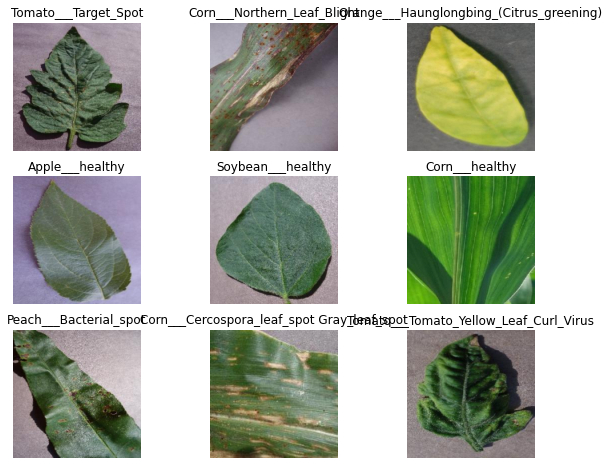

In [5]:
img_data.show_batch(figsize=(10, 8))

In [6]:
img_data.c

39

In [7]:
img_data.train.vocab

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl

In [8]:
img_data.train_ds.items

[Path('/Users/dipeshsonawane/Desktop/THND/Plant-Disease-Detection-Web-application/Dataset/Plant_leave_diseases_dataset_with_augmentation/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (668).jpg'),
 Path('/Users/dipeshsonawane/Desktop/THND/Plant-Disease-Detection-Web-application/Dataset/Plant_leave_diseases_dataset_with_augmentation/Tomato___Septoria_leaf_spot/image (1446).JPG'),
 Path('/Users/dipeshsonawane/Desktop/THND/Plant-Disease-Detection-Web-application/Dataset/Plant_leave_diseases_dataset_with_augmentation/Potato___healthy/image (338).JPG'),
 Path('/Users/dipeshsonawane/Desktop/THND/Plant-Disease-Detection-Web-application/Dataset/Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_mosaic_virus/image (587).JPG'),
 Path('/Users/dipeshsonawane/Desktop/THND/Plant-Disease-Detection-Web-application/Dataset/Plant_leave_diseases_dataset_with_augmentation/Grape___healthy/image (358).JPG'),
 Path('/Users/dipeshsonawane/Desktop/THND/Plant-Disease-Detection-Web-application/Data

In [9]:
model = cnn_learner(img_data, models.resnet34, metrics=[accuracy, error_rate])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
model.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,error_rate,time


KeyboardInterrupt: 

In [ ]:
model.fit_one_cycle(5, lr_max=slice(1e-03, 1e-02))

In [ ]:
model.freeze()

In [ ]:
lr = 1e-3/2
model.fit_one_cycle(3, slice(lr))

In [ ]:
model.save('train_final5_cycles')

In [ ]:
model.load('train_final5_cycles')

In [ ]:
model.export('export_resnet34_model.pkl')